In [274]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
import string
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer

In [275]:
df=pd.read_csv('spam.csv',encoding  = 'latin')

In [276]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [277]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis =1 ,inplace = True)

In [278]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [279]:
df.shape

(5572, 2)

In [280]:
import seaborn as sns

In [281]:
df.columns = ['Category','text']

In [282]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

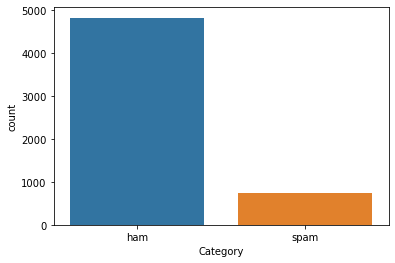

In [283]:
sns.countplot(data=df,x='Category')
plt.show()

In [284]:
df.isnull().sum()

Category    0
text        0
dtype: int64

In [285]:
df.Category.value_counts()
df.replace('ham',0,inplace = True)
df.replace('spam',1,inplace = True)

In [286]:
dataset = df.copy()

In [287]:
dataset['text']=dataset['text'].str.lower()
# dataset2['text']=dataset2['text'].str.lower()
dataset['text'].tail()

5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: text, dtype: object

In [288]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

# Cleaning and removing repeating characters
import re
def cleaning_repeating_char(text):
#     return re.sub(r'(.)1+', r'1', text)
    return re.sub(r'([a-z])\1+', r'\1', text)

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [289]:
processing_functions_list = [cleaning_stopwords,cleaning_punctuations,cleaning_numbers,cleaning_URLs,cleaning_repeating_char]
for func in processing_functions_list:
    dataset['text']= dataset['text'].apply(lambda x: func(x))
#     dataset2['text']= dataset2['text'].apply(lambda x: func(x))

In [290]:

dataset.head()


,Category,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,fre entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [291]:
import nltk

In [292]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\92333\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [293]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    nltk_tokens =  nltk.word_tokenize(data)
    text = ''
    for w in nltk_tokens:
        text+=st.stem(w)
        text+=' '
    return text

lm = WordNetLemmatizer()
def lemmatizer_on_text(data):
    nltk_tokens = nltk.word_tokenize(data)
    text = ''
    for w in nltk_tokens:
        text += lm.lemmatize(w)
        text += ' '
    return text

In [294]:
dataset['text'] = dataset.text.apply(lambda x : lemmatizer_on_text(x))

In [295]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\92333\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [296]:
dataset.head()

,Category,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,fre entry wkly comp win fa cup final tkts st m...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [297]:
X=dataset.text
y=dataset.Category

In [298]:
X.shape

(5572,)

In [299]:
y.value_counts()

0    4825
1     747
Name: Category, dtype: int64

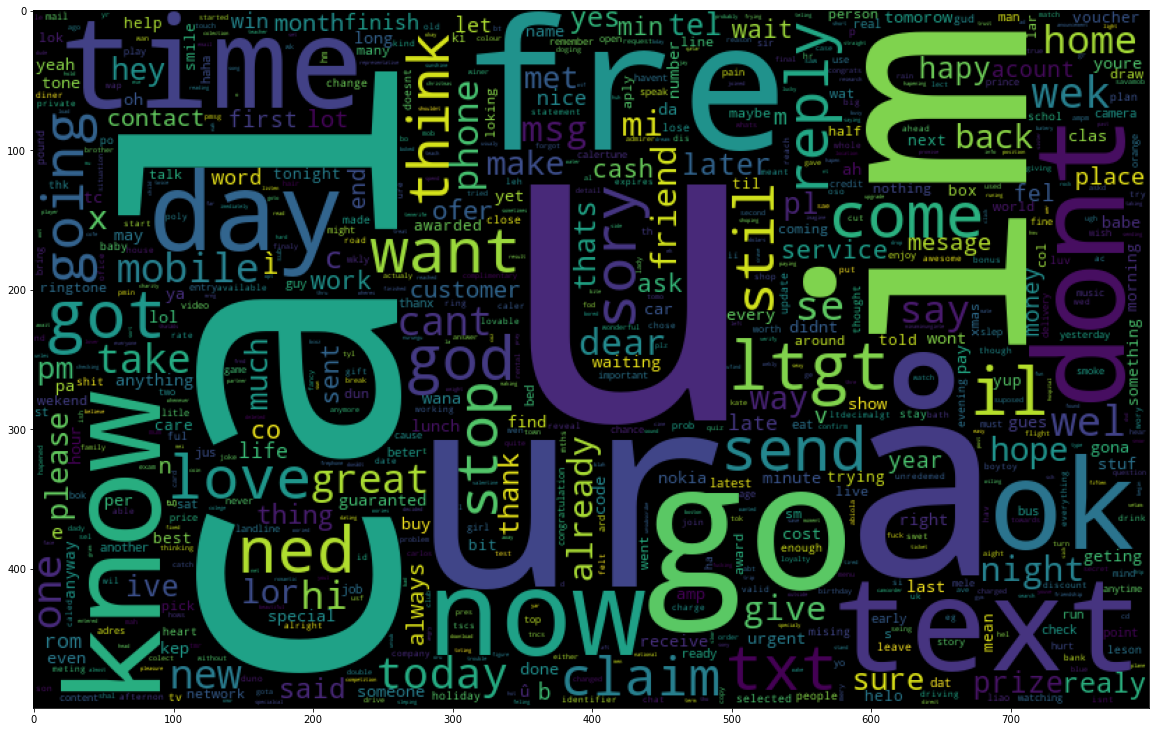

In [300]:
from wordcloud import WordCloud
df_spam = X[:1000]
wc = WordCloud(max_words = 1000 , width = 800 , height = 500,
              collocations=False).generate(" ".join(df_spam))
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.show()

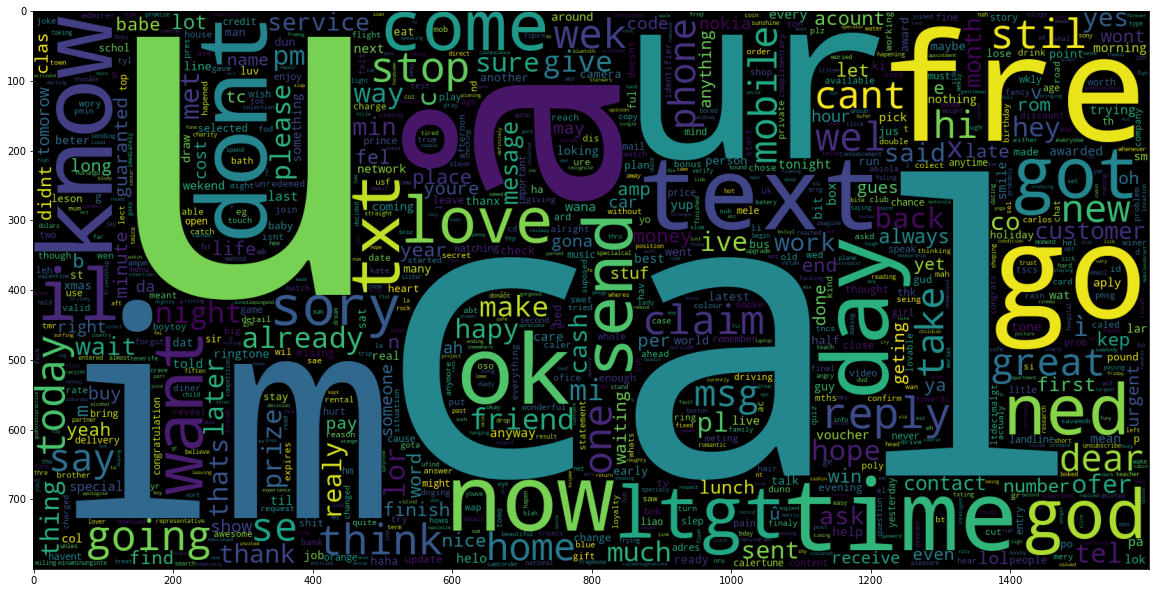

In [301]:
from wordcloud import WordCloud
df_ham = X[:1000]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(df_ham))
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.show()

In [302]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87653)

In [303]:
print(X.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [304]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

In [305]:
x_train_feature=feature_extraction.fit_transform(x_train)
x_test_feature=feature_extraction.transform(x_test)

In [306]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [307]:
print(x_train_feature)

  (0, 543)	0.49573724854780055
  (0, 2622)	0.38275068996318423
  (0, 4888)	0.4693265029478385
  (0, 769)	0.36028884509936304
  (0, 3451)	0.5076131119885324
  (1, 2667)	0.8065212440885356
  (1, 2622)	0.5912051106290276
  (2, 3209)	0.42291705979190464
  (2, 6183)	0.5445546448318805
  (2, 5827)	0.3500585024760284
  (2, 1577)	0.3094292205105299
  (2, 3746)	0.5534564135209579
  (3, 2698)	0.7153251775123433
  (3, 1100)	0.43245971384658427
  (3, 3288)	0.5488975189565578
  (4, 3962)	0.24617881890738924
  (4, 4365)	0.2580530182964177
  (4, 1047)	0.30612537362753434
  (4, 2304)	0.30612537362753434
  (4, 2573)	0.23082480575053255
  (4, 4515)	0.30612537362753434
  (4, 2900)	0.29896341691861117
  (4, 5777)	0.23845164371009797
  (4, 3346)	0.16668927783940682
  (4, 3721)	0.28766268767373415
  :	:
  (4455, 3772)	0.37801484667195423
  (4455, 6641)	0.26180289797336004
  (4455, 5357)	0.4137951860476263
  (4455, 3405)	0.24974367174709322
  (4456, 4687)	0.3075613826087535
  (4456, 2594)	0.29324274736520434

In [308]:
nbmodel=pickle.load(open('naviebayes_pickle','rb'))
svmodel=pickle.load(open('svm_pickle','rb'))
xgmodel=pickle.load(open('model.pkl', 'rb'))



In [309]:
from sklearn.metrics import accuracy_score

In [310]:
models = [nbmodel,svmodel,xgmodel]

In [311]:
accuracy_scores = [accuracy_score(y_test,mod.predict(x_test_feature))*100 for mod in models]

In [312]:
accuracy_scores

[96.8609865470852, 98.29596412556054, 97.39910313901345]

<AxesSubplot:>

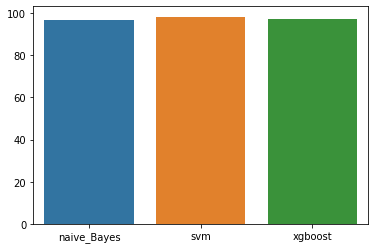

In [313]:
names = ['naive_Bayes','svm','xgboost']
sns.barplot(x = names,y=accuracy_scores)

In [314]:
def checking_Accuracy():
    svm_pre=svmodel.predict(x_test_feature)
    xgb_model_pre = xgmodel.predict(x_test_feature)
    nb_pre=nbmodel.predict(x_test_feature)
    print('accuracy of svm', accuracy_score(y,svm_pre))
    print('accuracy of xgb', accuracy_score(y,xgb_model_pre))
    print('accuracy of nayebayes', accuracy_score(y,nb_pre))
    